In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 北京租房数据统计分析

## 数据读取

In [ ]:
file_data = pd.read_csv("../data/链家北京租房数据.csv")
file_data[:5]

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11平米,10000
1,东城,北官厅胡同2号院,3室0厅,56.92平米,6000
2,东城,和平里三区,1室1厅,40.57平米,6900
3,东城,菊儿胡同,2室1厅,57.09平米,8000
4,东城,交道口北二条35号院,1室1厅,42.67平米,5500


In [ ]:
file_data.shape

(8223, 5)

In [ ]:
# info() 查看基本信息
file_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   区域       8223 non-null   object
 1   小区名称     8223 non-null   object
 2   户型       8223 non-null   object
 3   面积(㎡)    8223 non-null   object
 4   价格(元/月)  8223 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 321.3+ KB


In [ ]:
# 这里只有一列,因为只有价钱可以求值
file_data.describe()

,价格(元/月)
count,8223.000000
mean,9512.297823
std,9186.752612
min,566.000000
25%,4800.000000
50%,6800.000000
75%,10000.000000
max,150000.000000


## 数据预处理
### 重复值和空值处理    	duplicated    drop_duplicates

In [ ]:
# 重复数据检测
np.any(file_data.duplicated())

True

In [ ]:
# 删除重复数据
file_data = file_data.drop_duplicates()
# 重新检测,全部不为
np.any(file_data.duplicated())

False

In [ ]:
# 说明没有空数据
np.any(file_data.isnull())

False

In [ ]:
# 删除缺失数据
file_data = file_data.dropna()

### 数据转换类型

In [ ]:
# 创建一个空数组
data_new = np.array([])
# 获取面积
data = file_data["面积(㎡)"].values
data

array(['59.11平米', '56.92平米', '40.57平米', ..., '92.41平米', '71.81平米',
       '35.43平米'], dtype=object)

In [ ]:
for i in data:
    #                                 去除后面的单位
    data_new = np.append(data_new, np.array(i[:-2:]))
data_new

array(['59.11', '56.92', '40.57', ..., '92.41', '71.81', '35.43'],
      dtype='<U32')

In [ ]:
# 通过astype()方法将str类型转换为float64类型
data = data_new.astype(np.float64)
data

array([59.11, 56.92, 40.57, ..., 92.41, 71.81, 35.43])

In [ ]:
# 用新的数据替换
# file_data.loc[:, '面积(㎡)'] = data
file_data["面积(㎡)"] = data
file_data.head()

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11,10000
1,东城,北官厅胡同2号院,3室0厅,56.92,6000
2,东城,和平里三区,1室1厅,40.57,6900
3,东城,菊儿胡同,2室1厅,57.09,8000
4,东城,交道口北二条35号院,1室1厅,42.67,5500


### 户型表达不清楚,要统一

In [ ]:
# 获取“户型”一列数据
housetype_data = file_data["户型"]
housetype_data

0        1室0厅
1        3室0厅
2        1室1厅
3        2室1厅
4        1室1厅
        ...  
8218     3室1厅
8219    4房间2卫
8220     3室1厅
8221     2室1厅
8222     1室1厅
Name: 户型, Length: 5773, dtype: object

In [ ]:
temp_list = []
for i in housetype_data:
    new_info = i.replace("房间", "室")
    temp_list.append(new_info)


# file_data.loc[:,'户型'] = temp_list
file_data["户型"] = temp_list
file_data

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11,10000
1,东城,北官厅胡同2号院,3室0厅,56.92,6000
2,东城,和平里三区,1室1厅,40.57,6900
3,东城,菊儿胡同,2室1厅,57.09,8000
4,东城,交道口北二条35号院,1室1厅,42.67,5500
...,...,...,...,...,...
8218,顺义,怡馨家园,3室1厅,114.03,5500
8219,顺义,旭辉26街区,4室2卫,59.00,5000
8220,顺义,前进花园玉兰苑,3室1厅,92.41,5800
8221,顺义,双裕小区,2室1厅,71.81,4200


In [ ]:
temp_list = []
for i in housetype_data:
    new_info = i.replace("卫", "厅")
    temp_list.append(new_info)

file_data["户型"] = temp_list
file_data

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11,10000
1,东城,北官厅胡同2号院,3室0厅,56.92,6000
2,东城,和平里三区,1室1厅,40.57,6900
3,东城,菊儿胡同,2室1厅,57.09,8000
4,东城,交道口北二条35号院,1室1厅,42.67,5500
...,...,...,...,...,...
8218,顺义,怡馨家园,3室1厅,114.03,5500
8219,顺义,旭辉26街区,4室2厅,59.00,5000
8220,顺义,前进花园玉兰苑,3室1厅,92.41,5800
8221,顺义,双裕小区,2室1厅,71.81,4200


## 图表分析
### 房源数量、位置分布分析

In [ ]:
file_data["区域"].unique()

array(['东城', '丰台', '亦庄开发区', '大兴', '房山', '昌平', '朝阳', '海淀', '石景山', '西城',
       '通州', '门头沟', '顺义'], dtype=object)

In [ ]:
# 创建一个DataFrame对象，该对象只有两列数据：区域和数量
new_df = pd.DataFrame({"区域": file_data["区域"].unique(), "数量": [0] * 13})
new_df

,区域,数量
0,东城,0
1,丰台,0
2,亦庄开发区,0
3,大兴,0
4,房山,0
5,昌平,0
6,朝阳,0
7,海淀,0
8,石景山,0
9,西城,0


In [ ]:
# 按“区域”列将file_data进行分组，并统计每个分组的数量
group_area = file_data.groupby(by="区域").count()
group_area.values

array([[ 282,  282,  282,  282],
       [ 577,  577,  577,  577],
       [ 147,  147,  147,  147],
       [ 362,  362,  362,  362],
       [ 180,  180,  180,  180],
       [ 347,  347,  347,  347],
       [1597, 1597, 1597, 1597],
       [ 605,  605,  605,  605],
       [ 175,  175,  175,  175],
       [ 442,  442,  442,  442],
       [ 477,  477,  477,  477],
       [ 285,  285,  285,  285],
       [ 297,  297,  297,  297]], dtype=int64)

In [ ]:
new_df["数量"] = group_area.values
new_df

,区域,数量
0,东城,282
1,丰台,577
2,亦庄开发区,147
3,大兴,362
4,房山,180
5,昌平,347
6,朝阳,1597
7,海淀,605
8,石景山,175
9,西城,442


In [ ]:
# 按“数量”一列从大到小排列
new_df.sort_values(by="数量", ascending=False)

,区域,数量
6,朝阳,1597
7,海淀,605
1,丰台,577
10,通州,477
9,西城,442
3,大兴,362
5,昌平,347
12,顺义,297
11,门头沟,285
0,东城,282


### 户型数量分析

In [ ]:
house_data = file_data["户型"]
# house_data是Series
house_data

0       1室0厅
1       3室0厅
2       1室1厅
3       2室1厅
4       1室1厅
        ... 
8218    3室1厅
8219    4室2厅
8220    3室1厅
8221    2室1厅
8222    1室1厅
Name: 户型, Length: 5773, dtype: object

In [ ]:
def all_house(arr):
    # 去重
    key = np.unique(arr)
    result = {}
    for k in key:
        # mask是一个 Series
        mask = arr == k
        print(mask)
        arr_new = arr[mask]
        # 数量
        v = arr_new.size
        # k代表第几个,
        result[k] = v
    return result


# 获取户型数据 是一个字典
house_info = all_house(house_data)
house_info

0       False
1       False
2       False
3       False
4       False
        ...  
8218    False
8219    False
8220    False
8221    False
8222    False
Name: 户型, Length: 5773, dtype: bool
0        True
1       False
2       False
3       False
4       False
        ...  
8218    False
8219    False
8220    False
8221    False
8222    False
Name: 户型, Length: 5773, dtype: bool
0       False
1       False
2        True
3       False
4        True
        ...  
8218    False
8219    False
8220    False
8221    False
8222     True
Name: 户型, Length: 5773, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
8218    False
8219    False
8220    False
8221    False
8222    False
Name: 户型, Length: 5773, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
8218    False
8219    False
8220    False
8221    False
8222    False
Name: 户型, Length: 5773, dtype: bool
0       False
1       False
2       False
3       

{'0室0厅': 1,
 '1室0厅': 254,
 '1室1厅': 970,
 '1室2厅': 13,
 '2室0厅': 24,
 '2室1厅': 2369,
 '2室2厅': 287,
 '2室3厅': 1,
 '3室0厅': 15,
 '3室1厅': 858,
 '3室2厅': 537,
 '3室3厅': 11,
 '4室1厅': 73,
 '4室2厅': 215,
 '4室3厅': 14,
 '4室5厅': 2,
 '5室0厅': 2,
 '5室1厅': 10,
 '5室2厅': 56,
 '5室3厅': 27,
 '5室4厅': 1,
 '5室5厅': 1,
 '6室0厅': 1,
 '6室1厅': 2,
 '6室2厅': 5,
 '6室3厅': 8,
 '6室4厅': 2,
 '7室1厅': 1,
 '7室2厅': 2,
 '7室3厅': 3,
 '7室4厅': 1,
 '8室4厅': 2,
 '9室1厅': 2,
 '9室2厅': 1,
 '9室5厅': 2}

In [ ]:
# 使用字典推导式                                                户型多余50才显示
# house_type = dict((key, value) for key, value in house_info.items() if value > 50)
house_type = {key: value for key, value in house_info.items() if value > 50}
house_type

{'1室0厅': 254,
 '1室1厅': 970,
 '2室1厅': 2369,
 '2室2厅': 287,
 '3室1厅': 858,
 '3室2厅': 537,
 '4室1厅': 73,
 '4室2厅': 215,
 '5室2厅': 56}

In [ ]:
# 显示的房子
show_houses = pd.DataFrame(
    {"户型": [x for x in house_type.keys()], "数量": [x for x in house_type.values()]}
)
show_houses

,户型,数量
0,1室0厅,254
1,1室1厅,970
2,2室1厅,2369
3,2室2厅,287
4,3室1厅,858
5,3室2厅,537
6,4室1厅,73
7,4室2厅,215
8,5室2厅,56


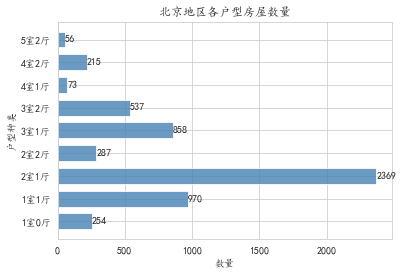

In [ ]:
house_type1 = show_houses["户型"]
house_type_num = show_houses["数量"]

# 横向条形图
#
plt.barh(house_type1, house_type_num, height=0.7, color="steelblue", alpha=0.8)

# 把x轴坐标延长到2500
plt.xlabel("数量")
plt.ylabel("户型种类")
plt.title("北京地区各户型房屋数量")


# 给每个柱子加数字
for x, y in enumerate(house_type_num):
    plt.text(y + 0.2, x - 0.1, "%s" % y)


# 解决中文显示问题
plt.rcParams["font.sans-serif"] = ["KaiTi"]  # 指定默认字体
plt.rcParams["axes.unicode_minus"] = False  # 解决保存图像是负号'-'显示为方块的问题
plt.show()

### 平均租金分析

In [ ]:
# 新建一个DataFrame对象，设置房租总金额和总面积初始值为0
df_all = pd.DataFrame(
    {"区域": file_data["区域"].unique(), "房租总金额": [0] * 13, "总面积(㎡)": [0] * 13}
)
df_all

,区域,房租总金额,总面积(㎡)
0,东城,0,0
1,丰台,0,0
2,亦庄开发区,0,0
3,大兴,0,0
4,房山,0,0
5,昌平,0,0
6,朝阳,0,0
7,海淀,0,0
8,石景山,0,0
9,西城,0,0


In [ ]:
# 求总金额和总面积                列名在前在后都可以
sum_price = file_data.groupby(file_data["区域"])["价格(元/月)"].sum()
sum_area = file_data["面积(㎡)"].groupby(file_data["区域"]).sum()
sum_price, sum_area

(区域
 东城        3945550
 丰台        4404893
 亦庄开发区     1318400
 大兴        2286950
 房山         726750
 昌平        2521515
 朝阳       20281396
 海淀        7279350
 石景山       1156500
 西城        5636975
 通州        2719600
 门头沟       1048300
 顺义        2190900
 Name: 价格(元/月), dtype: int64,
 区域
 东城        27353.99
 丰台        50922.79
 亦庄开发区     15995.53
 大兴        35884.15
 房山        15275.41
 昌平        35972.92
 朝阳       166921.72
 海淀        57210.39
 石景山       13956.67
 西城        37141.64
 通州        46625.23
 门头沟       20258.20
 顺义        33668.97
 Name: 面积(㎡), dtype: float64)

In [ ]:
# sum_price和sum_area是Series 所以通过value获取值
df_all["房租总金额"] = sum_price.values
df_all["总面积(㎡)"] = sum_area.values
df_all.head()

,区域,房租总金额,总面积(㎡)
0,东城,3945550,27353.99
1,丰台,4404893,50922.79
2,亦庄开发区,1318400,15995.53
3,大兴,2286950,35884.15
4,房山,726750,15275.41


In [ ]:
# 计算各区域每平米房租价格,并保留两位小数
df_all["每平米租金(元)"] = round(df_all["房租总金额"] / df_all["总面积(㎡)"], 2)
df_all.head()

,区域,房租总金额,总面积(㎡),每平米租金(元)
0,东城,3945550,27353.99,144.24
1,丰台,4404893,50922.79,86.50
2,亦庄开发区,1318400,15995.53,82.42
3,大兴,2286950,35884.15,63.73
4,房山,726750,15275.41,47.58


In [ ]:
# new_df 存放的是 区域和数量
new_df

,区域,数量
0,东城,282
1,丰台,577
2,亦庄开发区,147
3,大兴,362
4,房山,180
5,昌平,347
6,朝阳,1597
7,海淀,605
8,石景山,175
9,西城,442


In [ ]:
# concat 是直接左右拼接,会有重复值
# df_merge = pd.concat([new_df, df_all], axis=1)

# new_df 与 df_all 进行合并   merge 默认内连接
df_merge = pd.merge(new_df, df_all)

df_merge

,区域,数量,房租总金额,总面积(㎡),每平米租金(元)
0,东城,282,3945550,27353.99,144.24
1,丰台,577,4404893,50922.79,86.50
2,亦庄开发区,147,1318400,15995.53,82.42
3,大兴,362,2286950,35884.15,63.73
4,房山,180,726750,15275.41,47.58
5,昌平,347,2521515,35972.92,70.09
6,朝阳,1597,20281396,166921.72,121.50
7,海淀,605,7279350,57210.39,127.24
8,石景山,175,1156500,13956.67,82.86
9,西城,442,5636975,37141.64,151.77


In [ ]:
# 数量
num = df_merge["数量"]
# 价格
price = df_merge["每平米租金(元)"]
num, price

(0      282
 1      577
 2      147
 3      362
 4      180
 5      347
 6     1597
 7      605
 8      175
 9      442
 10     477
 11     285
 12     297
 Name: 数量, dtype: int64,
 0     144.24
 1      86.50
 2      82.42
 3      63.73
 4      47.58
 5      70.09
 6     121.50
 7     127.24
 8      82.86
 9     151.77
 10     58.33
 11     51.75
 12     65.07
 Name: 每平米租金(元), dtype: float64)

In [ ]:
l = [i for i in range(13)]
l

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [ ]:
# 区域数据
lx = df_merge["区域"]
lx

0        东城
1        丰台
2     亦庄开发区
3        大兴
4        房山
5        昌平
6        朝阳
7        海淀
8       石景山
9        西城
10       通州
11      门头沟
12       顺义
Name: 区域, dtype: object

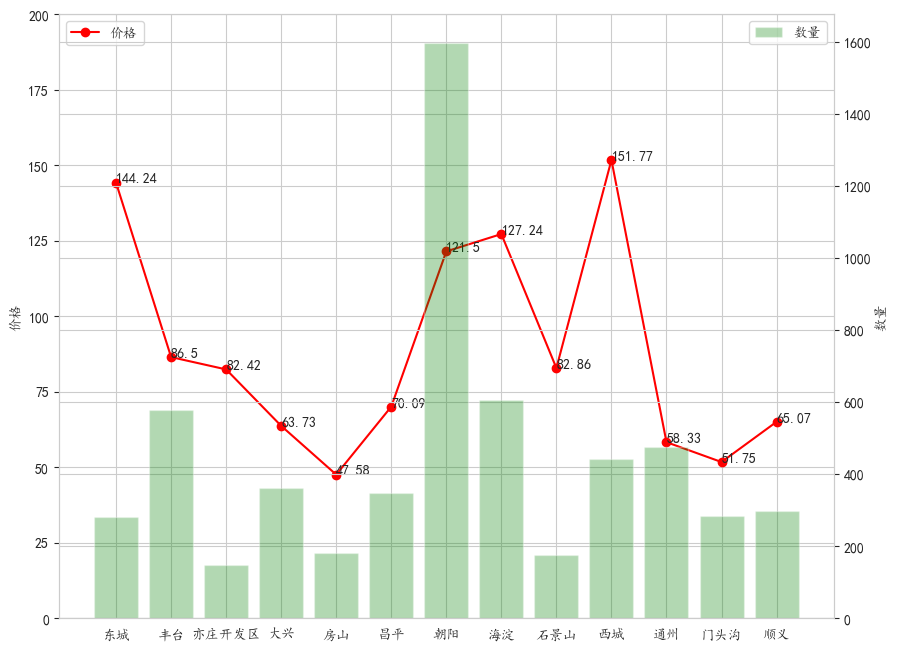

In [ ]:
# l 是 x轴下标  lx 是x下标文字
# 画图
fig = plt.figure(figsize=(10, 8), dpi=100)

# 显示折线图
ax1 = fig.add_subplot(111)
ax1.plot(l, price, "or-", label="价格")  # "or-" 显示那个小红圆点
for i, (_x, _y) in enumerate(zip(l, price)):
    plt.text(_x, _y, price[i])

# y轴数字显示
ax1.set_ylim([0, 200])
ax1.set_ylabel("价格")
# 标签位置
plt.legend(loc="upper left")


# 显示条形图
ax2 = ax1.twinx()  # 显示次坐标轴ax2=ax1.twinx()
plt.bar(l, num, alpha=0.3, color="green", label="数量")
ax2.set_ylabel("数量")
# 标签位置
plt.legend(loc="upper right")

# x轴坐标显示
plt.xticks(l, lx)

plt.show()

### 面积区间分析

In [ ]:
(
    file_data["面积(㎡)"].max(),
    file_data["面积(㎡)"].max(),
    file_data["价格(元/月)"].max(),
    file_data["价格(元/月)"].min(),
)

(1133.0, 1133.0, 150000, 566)

In [ ]:
file_data["面积(㎡)"]

0        59.11
1        56.92
2        40.57
3        57.09
4        42.67
         ...  
8218    114.03
8219     59.00
8220     92.41
8221     71.81
8222     35.43
Name: 面积(㎡), Length: 5773, dtype: float64

In [ ]:
# 面积划分
area_divide = [1, 30, 50, 70, 90, 120, 140, 160, 1200]
# area_cut = pd.cut(file_data['面积(㎡)'], area_divide)

# 要将 file_data['面积(㎡)'] 转换为list
area_cut = pd.cut(list(file_data["面积(㎡)"]), area_divide)
area_cut

[(50, 70], (50, 70], (30, 50], (50, 70], (30, 50], ..., (90, 120], (50, 70], (90, 120], (70, 90], (30, 50]]
Length: 5773
Categories (8, interval[int64]): [(1, 30] < (30, 50] < (50, 70] < (70, 90] < (90, 120] < (120, 140] < (140, 160] < (160, 1200]]

In [ ]:
area_cut_data = area_cut.describe()
area_cut_data

,counts,freqs
categories,,
"(1, 30]",41,0.007102
"(30, 50]",710,0.122986
"(50, 70]",1566,0.271263
"(70, 90]",1094,0.189503
"(90, 120]",1082,0.187424
"(120, 140]",381,0.065997
"(140, 160]",274,0.047462
"(160, 1200]",625,0.108263


In [ ]:
# 因为是百分比所以要乘100
area_percentage = (area_cut_data["freqs"].values) * 100
area_percentage

array([ 0.71020267, 12.29863156, 27.1262775 , 18.95028581, 18.74242162,
        6.5996882 ,  4.74623246, 10.82626018])

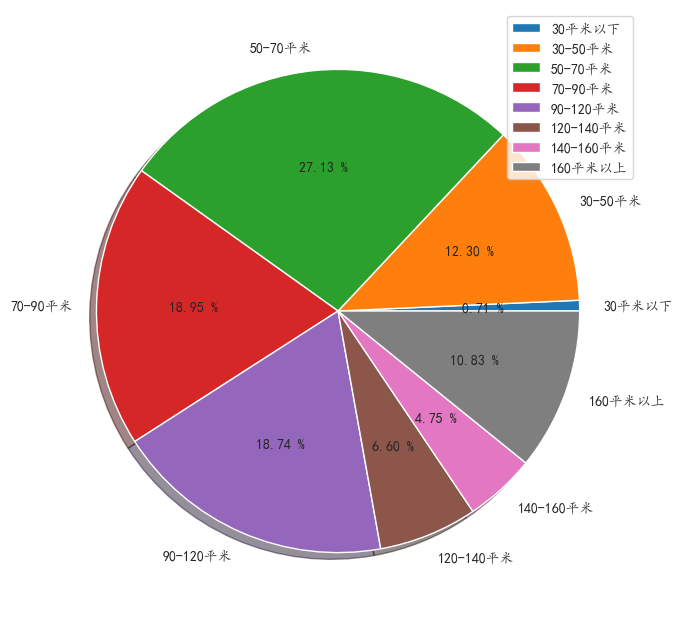

In [ ]:
labels = [
    "30平米以下",
    "30-50平米",
    "50-70平米",
    "70-90平米",
    "90-120平米",
    "120-140平米",
    "140-160平米",
    "160平米以上",
]

plt.figure(figsize=(20, 8), dpi=100)
# plt.axes(aspect=1)    # 显示的是圆形,如果不加,是椭圆形     autopct:占比显示指定%1.2f%%
plt.pie(area_percentage, labels=labels, autopct="%.2f %%", shadow=True)
plt.legend(loc="upper right")
plt.show()